# This Notebook Demonstrates Three Issues:

## 1. Scene/Data Corners versus Product Corners
## 2. WRS edge conditions
## 3. Some contrast stretch methods are not smart about fill


1. Load AOI from GeoJson

In [1]:
!ls

01-Lake-Isabella-animation-sadness-data-fill-sucks-gif.ipynb
01-Sanath-p045r031-Lake-Isabella-mp4.ipynb
01-Sanath-p045r031-Lake-Isabella.ipynb
isa.gif
isabella-lake.geojson
isabella.mp4


In [2]:
from datetime import datetime

In [3]:
my_aoi_file = 'isabella-lake.geojson'
from notebookLib.nb_display import Ldisplay
ld = Ldisplay()
ld.map_geojson(my_aoi_file)

creating Ldisplay class


In [4]:
import json 

with open(my_aoi_file) as f:
    data = json.load(f)
    
data
    


{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-118.60565185546874, 35.5506639937922],
      [-118.22937011718749, 35.5506639937922],
      [-118.22937011718749, 35.80055084130363],
      [-118.60565185546874, 35.80055084130363],
      [-118.60565185546874, 35.5506639937922]]]}}]}

In [5]:
coord = data['features'][0]['geometry']['coordinates']

x1 = coord[0][0][0]
x1

-118.60565185546874

In [6]:
y1 = coord[0][0][1]
y1

35.5506639937922

In [7]:
x2 = coord[0][2][0]
x2

-118.22937011718749

In [8]:
y2 = coord[0][2][1]
y2

35.80055084130363

In [9]:
import datacube
from odc.ui import with_ui_cbk

In [10]:
dc = datacube.Datacube()
ds = dc.find_datasets(product= "c1l2scenealbers",
                     x=(x1, x2),
                y=(y1, y2),)

In [11]:
len(ds)

588

In [12]:
EPSG='5072'


'''
meas=[ 
    'blue',                              
    'green',                            
    'red',                                
]
'''

meas=[ 
    'swir_1',                              
    'nir',                            
    'green',                                
]

'''
meas=['coastal_aerosol', 
    'blue',                              
    'green',                            
    'red',                                
    'nir',                              
    'swir_1',                             
    'swir_2',                             
    'quality_l2_aerosol']  
'''

## KEEP data range smaller this time - someday get better grasp on memory, docker, jupyter equation

## KEEP date range smaller this time

ds2 = dc.load(product="c1l2scenealbers",  
                measurements=meas, 
                output_crs='epsg:' + EPSG,
                resolution=(-30, 30),
                x=(x1, x2),
                y=(y1, y2),
                progress_cbk=with_ui_cbk(),
                time=("2016-01-01", "2016-12-31")
              
             )

In [13]:
ds2

<xarray.Dataset>
Dimensions:  (time: 68, x: 1313, y: 1171)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-05T18:34:11.431860 ... 2016-12-31T18:28:33.756437
  * y        (y) float64 1.656e+06 1.656e+06 1.656e+06 ... 1.621e+06 1.621e+06
  * x        (x) float64 -2.012e+06 -2.012e+06 ... -1.973e+06 -1.973e+06
Data variables:
    swir_1   (time, y, x) uint16 1909 1877 1888 1913 1916 1952 ... 0 0 0 0 0 0
    nir      (time, y, x) uint16 8511 8405 8332 8284 8273 8303 ... 0 0 0 0 0 0
    green    (time, y, x) uint16 8874 8794 8748 8739 8758 8758 ... 0 0 0 0 0 0
Attributes:
    crs:      epsg:5072

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Generating 68 frame animation
    Exporting animation to ./broken-isabella-animation.gif


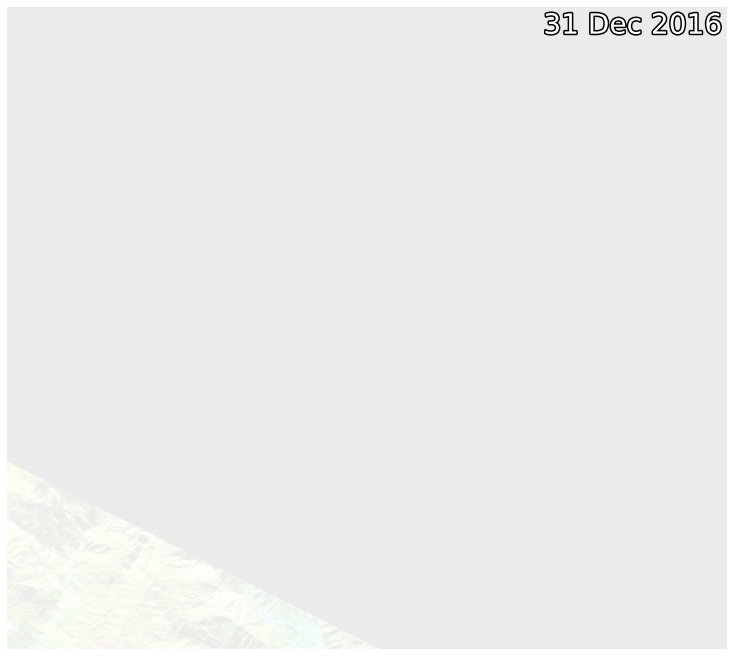

In [15]:
from notebookLib.nb_animate import nb_animated_timeseries

nb_animated_timeseries(ds2,output_path='./broken-isabella-animation.gif',bands = ['swir_1', 'nir', 'green'], time_dim='time',  
      percentile_stretch=(.2,.85), interval=600)